In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [ ]:
x_train = np.reshape(x_train,(-1, 3072))/255.0
x_test = np.reshape(x_test,(-1, 3072))/255.0

print(x_train.shape, x_test.shape)

(50000, 3072) (10000, 3072)


In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

print(y_train.shape, y_test.shape)

(50000, 10) (10000, 10)


In [ ]:
print(x_train[0])
print(y_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Dense Neural Network**

In [ ]:
hidden_activation = 'relu'
output_activation = 'softmax'

learning_rate = 0.00010

model = tf.keras.Sequential([

                             tf.keras.layers.Dense(5000, activation= hidden_activation),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(2500, activation= hidden_activation),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(1000, activation= hidden_activation),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(500, activation= hidden_activation),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(250, activation= hidden_activation),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(10, activation= output_activation)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer= optimizer, loss= loss, metrics= ['accuracy'])

In [ ]:
epochs = 50
batch_size = 100

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2, validation_data= (x_test, y_test))

Epoch 1/50
500/500 - 5s - loss: 1.2340 - accuracy: 0.5594 - val_loss: 1.2951 - val_accuracy: 0.5395 - 5s/epoch - 11ms/step
Epoch 2/50
500/500 - 5s - loss: 1.2216 - accuracy: 0.5621 - val_loss: 1.3108 - val_accuracy: 0.5380 - 5s/epoch - 11ms/step
Epoch 3/50
500/500 - 5s - loss: 1.2043 - accuracy: 0.5720 - val_loss: 1.3100 - val_accuracy: 0.5294 - 5s/epoch - 11ms/step
Epoch 4/50
500/500 - 5s - loss: 1.1886 - accuracy: 0.5767 - val_loss: 1.2922 - val_accuracy: 0.5477 - 5s/epoch - 11ms/step
Epoch 5/50
500/500 - 5s - loss: 1.1744 - accuracy: 0.5819 - val_loss: 1.2828 - val_accuracy: 0.5466 - 5s/epoch - 11ms/step
Epoch 6/50
500/500 - 5s - loss: 1.1602 - accuracy: 0.5864 - val_loss: 1.2945 - val_accuracy: 0.5469 - 5s/epoch - 11ms/step
Epoch 7/50
500/500 - 5s - loss: 1.1456 - accuracy: 0.5914 - val_loss: 1.2757 - val_accuracy: 0.5563 - 5s/epoch - 11ms/step
Epoch 8/50
500/500 - 5s - loss: 1.1293 - accuracy: 0.5970 - val_loss: 1.2864 - val_accuracy: 0.5488 - 5s/epoch - 11ms/step
Epoch 9/50
500/5

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (100, 5000)               15365000  
                                                                 
 dropout (Dropout)           (100, 5000)               0         
                                                                 
 dense_1 (Dense)             (100, 2500)               12502500  
                                                                 
 dropout_1 (Dropout)         (100, 2500)               0         
                                                                 
 dense_2 (Dense)             (100, 1000)               2501000   
                                                                 
 dropout_2 (Dropout)         (100, 1000)               0         
                                                                 
 dense_3 (Dense)             (100, 500)                5

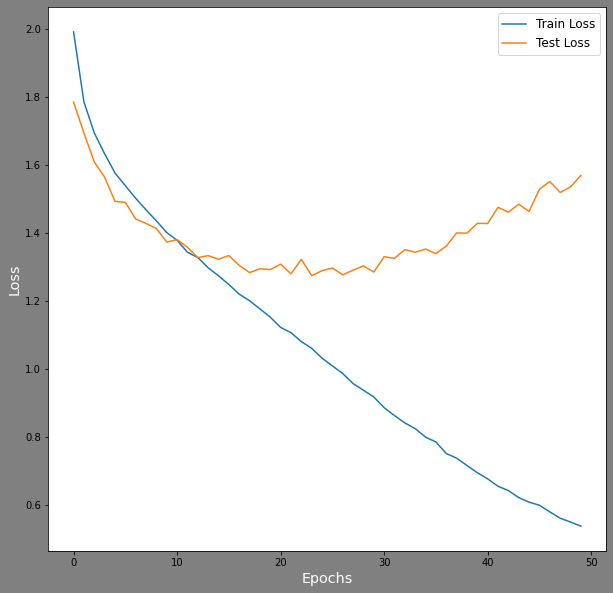

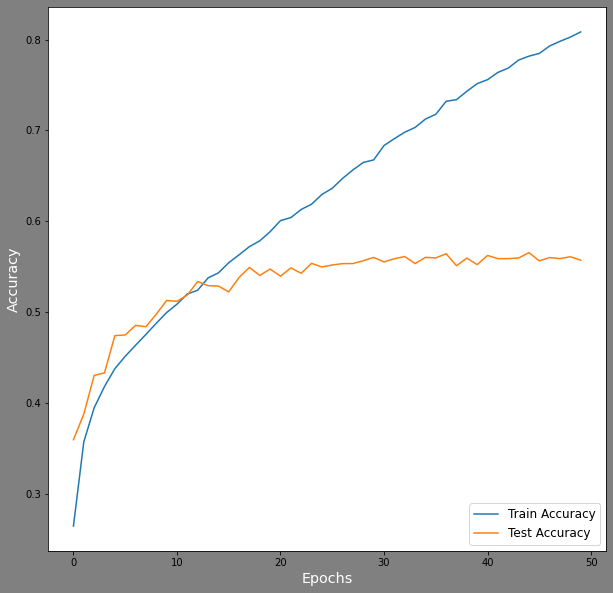

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

t = np.arange(0, epochs, 1.)

plt.figure(1, figsize=(10,10), facecolor='grey')

plt.plot(t, train_loss, t, val_loss)
plt.xlabel('Epochs', fontsize='x-large', color='white')
plt.ylabel('Loss', fontsize='x-large', color='white')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right', fontsize='large')

plt.figure(2, figsize=(10,10), facecolor='grey')

plt.plot(t, train_accuracy, t, val_accuracy)
plt.xlabel('Epochs', fontsize='x-large', color='white')
plt.ylabel('Accuracy', fontsize='x-large', color='white')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right', fontsize='large')

plt.show()